# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [42]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [43]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [44]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [45]:
# 2. Get the total drivers for each city type
total_driver=city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [46]:
#  3. Get the total amount of fares for each city type
total_fare=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [47]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride=total_fare/total_rides
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [48]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver=total_fare/total_driver
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [49]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({"Total Rides":total_rides,"Total Drivers":total_driver, "Total Fares":total_fare, "Average Fare per Ride":avg_fare_per_ride, "Average Fare per Driver":avg_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [50]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [51]:
#  8. Format the columns.
pyber_summary_df["Total Rides"]=pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"]=pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [52]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [53]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_df=pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum(["fare"]))
sum_of_fares_df

fare       ride_id  driver_count
type  date                                              
Rural 1/1/2019 9:45    43.69  2.424880e+12             1
      1/11/2019 4:39   16.42  8.800560e+12             6
      1/14/2019 15:58  54.10  4.329260e+11             6
      1/14/2019 7:09   18.05  5.405360e+12             1
      1/15/2019 21:44  30.26  3.837060e+12             1
...                      ...           ...           ...
Urban 5/8/2019 1:54    32.69  1.643410e+12            25
      5/8/2019 2:31    41.33  5.688920e+12             4
      5/8/2019 4:20    21.99  1.179980e+11            52
      5/8/2019 4:39    18.45  1.811570e+12            11
      5/8/2019 7:29    18.55  5.682020e+12            33

[2364 rows x 3 columns]

In [54]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_of_fares_df=sum_of_fares_df.reset_index()
sum_of_fares_df

,type,date,fare,ride_id,driver_count
0,Rural,1/1/2019 9:45,43.69,2.424880e+12,1
1,Rural,1/11/2019 4:39,16.42,8.800560e+12,6
2,Rural,1/14/2019 15:58,54.10,4.329260e+11,6
3,Rural,1/14/2019 7:09,18.05,5.405360e+12,1
4,Rural,1/15/2019 21:44,30.26,3.837060e+12,1
...,...,...,...,...,...
2359,Urban,5/8/2019 1:54,32.69,1.643410e+12,25
2360,Urban,5/8/2019 2:31,41.33,5.688920e+12,4
2361,Urban,5/8/2019 4:20,21.99,1.179980e+11,52
2362,Urban,5/8/2019 4:39,18.45,1.811570e+12,11


In [55]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_table=pd.pivot(sum_of_fares_df, values="fare", index=["date"], columns="type")
fares_table.head(12)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [56]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_table_sub=fares_table.loc['01-01-2019':'4-29-2019']
fares_table_sub


type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
3/9/2019 3:25,NaN,NaN,39.32
3/9/2019 3:50,NaN,NaN,40.86
3/9/2019 4:39,NaN,NaN,14.41


In [57]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_table.index=pd.to_datetime(fares_table.index)


In [58]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [59]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_pivot_df=fares_table.resample("W").sum()
fares_pivot_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [60]:
fares_pivot_df.describe()

type,Rural,Suburban,Urban
count,19.000000,19.000000,19.000000
mean,227.785789,1018.754211,2097.598947
std,108.575068,247.152001,412.742364
min,67.650000,308.210000,610.030000
25%,169.265000,915.735000,2047.425000
50%,191.850000,1045.060000,2178.570000
75%,286.865000,1157.025000,2330.250000
max,501.240000,1412.740000,2470.930000


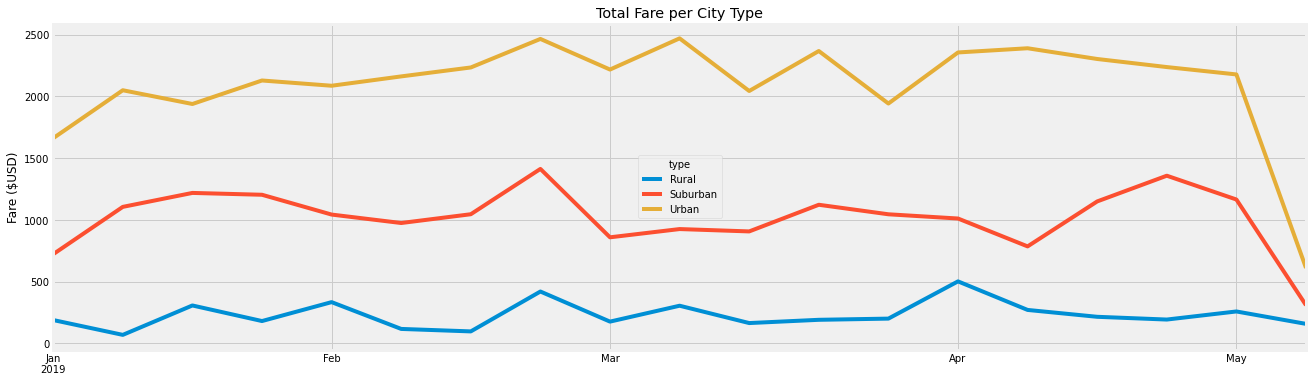

<Figure size 432x288 with 0 Axes>

In [61]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fares_chart=fares_pivot_df.plot(figsize=(20,6))
fares_chart.set_title("Total Fare per City Type")
fares_chart.set_ylabel("Fare ($USD)")
fares_chart.set_xlabel("")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Save and display the chart
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
plt.tight_layout()